# Linear regression model for student academic performance

## problem definition

In this problem,the student increase in percentage of marks according to the hours of study of the student is detected by linear model

### importing the data set to analyse

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from sklearn import linear_model


In [3]:
data=pd.read_csv('student.csv')

In [115]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [116]:
data.isna().sum()
#has no null value and its ready to go

Hours     0
Scores    0
dtype: int64

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


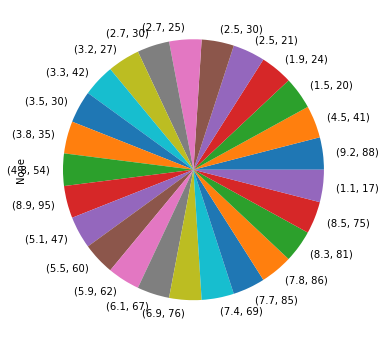

In [125]:
data.value_counts().plot(kind="pie",figsize=(10,6));
#these many different possiblity of values are available

## identifying which model can detect more accurately

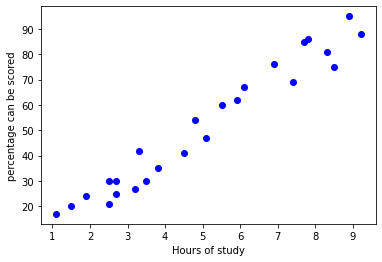

In [100]:
%matplotlib inline
plt.xlabel("Hours of study")
plt.ylabel("percentage can be scored")                                                            
plt.scatter(data.Hours,data.Scores,color=['blue']);
#seems like linear_model is best fit

In [31]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,0:1].values
y=data.iloc[:,1].values
y=data.Scores
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9468469003523444

the score can be increased by setting up a random seed so that the results are reproduced

In [70]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.974047128713709

### comparing with randomforest regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)
#the score is high with randomforestregressor than linear_model

0.9757665545739149

## Evaluating the accuracy of the models

In [72]:
clf.predict(x_test)

array([78.91      , 27.21416667, 27.21416667])

In [73]:
model.predict(x_test)

array([83.89727817, 27.15092273, 27.15092273])

In [88]:
np.array(y_test)#predicting with both the model rfr is more efficient

array([81, 30, 21], dtype=int64)

In [75]:
model.coef_

array([9.78385439])

In [76]:
model.intercept_

2.6912867616078273

## visualization of the models

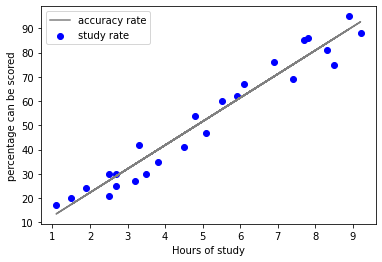

In [113]:
#the visualization of predicting with linear model and the prediction is
val=model.coef_*x+model.intercept_
%matplotlib inline
plt.xlabel("Hours of study")
plt.ylabel("percentage can be scored")                                                            
plt.scatter(x,y,color=['blue'])
plt.plot(x,val,color="grey")
plt.legend(["accuracy rate","study rate"]);


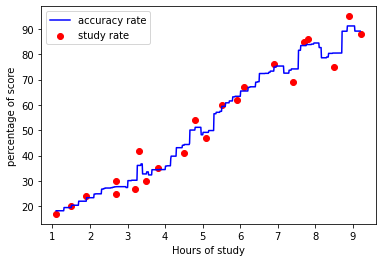

In [87]:
#visualization of predicting with random forest regressor and the prediction is
x_val=np.arange(min(x_train) ,max(x_train) ,0.01)
x_val=x_val.reshape((len(x_val),1))
plt.scatter(x_train,y_train,color="red")
plt.plot(x_val,clf.predict(x_val),color="blue")
plt.xlabel("Hours of study")
plt.ylabel("percentage of score")
plt.legend(["accuracy rate","study rate"])
plt.show()


## comparing the outputs

In [105]:
marks=clf.predict([[5.87]])
print("predicted marks:%d"%marks)
#on prediction with random forest classifer the result is more accurate than linear regression

predicted marks:63


In [106]:
#prediction with linear regresssion is less than random forest regression
mark=model.predict([[5.87]])
print("predicted marks:%d"%mark)

predicted marks:60


## Result

The model with accuracy 97.7% is built and tested with the value and obtained an close accurate value.Therfore the model has did a decent job